In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DSC_250_PROJECT/datasets/AGGREGATED_DATA

/content/drive/.shortcut-targets-by-id/1HumP_mLSONElRLrftcvoorQeGMRqKdcH/DSC_250_PROJECT/datasets/AGGREGATED_DATA


In [ ]:
%ls


financial_data.csv              gen_model_3_1_29.h5  news.csv                      X_test.npy
financial_tweets_data.csv       gen_model_3_1_44.h5  news_final1.csv               X_train.npy
financial_tweets_news_data.csv  gen_model_3_1_59.h5  news_final2.csv               yc_test.npy
gen_model_3_1_104.h5            gen_model_3_1_74.h5  news_final_agg.csv            yc_train.npy
gen_model_3_1_119.h5            gen_model_3_1_89.h5  news.gsheet                   y_scaler.pkl
gen_model_3_1_134.h5            GRU_30to3.h5         news_upd.csv                  y_test.npy
gen_model_3_1_149.h5            index_test.npy       news_upd.gsheet               y_train.npy
gen_model_3_1_14.h5             index_train.npy      tweet_embeddings_all_agg.csv
gen_model_3_1_164.h5            LSTM_3to1.h5         X_scaler.pkl


In [ ]:
import pandas as pd

file_path = 'financial_tweets_data.csv'
df = pd.read_csv(file_path)


In [ ]:
# def get_fourier_transfer(dataset):
#     # Get the columns for doing fourier
#     data_FT = dataset[['date', 'close']]

#     close_fft = np.fft.fft(np.asarray(data_FT['close'].tolist()))
#     fft_df = pd.DataFrame({'fft': close_fft})
#     fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
#     fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

#     fft_list = np.asarray(fft_df['fft'].tolist())
#     fft_com_df = pd.DataFrame()
#     for num_ in [3, 6, 9]:
#         fft_list_m10 = np.copy(fft_list);
#         fft_list_m10[num_:-num_] = 0
#         fft_ = np.fft.ifft(fft_list_m10)
#         fft_com = pd.DataFrame({'fft': fft_})
#         fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
#         fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
#         fft_com = fft_com.drop(columns='fft')
#         fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

#     return fft_com_df

In [ ]:
# #Get Fourier features
# dataset_F = get_fourier_transfer(df)
# Final_data = pd.concat([df, dataset_F], axis=1)

In [ ]:
# Final_data.head(20)

In [ ]:
# df = Final_data

In [ ]:
df.dtypes

date         object
open        float64
high        float64
low         float64
close       float64
             ...   
t2ve_508    float64
t2ve_509    float64
t2ve_510    float64
t2ve_511    float64
t2ve_512    float64
Length: 575, dtype: object

In [ ]:
# df['returns'] = ((df['Close'] / df['Close'].shift(1)) - 1) * 100

In [ ]:
# df.head(5)

In [ ]:
datetime_series = pd.to_datetime(df['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df = df.set_index(datetime_index)
df = df.sort_values(by='date')
df = df.drop(columns='date')

In [ ]:
df.head(5)

,open,high,low,close,adj close,volume,ticker,tp_0,tp_1,tp_2,...,t2ve_503,t2ve_504,t2ve_505,t2ve_506,t2ve_507,t2ve_508,t2ve_509,t2ve_510,t2ve_511,t2ve_512
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900.0,GOOG,1.0,0.0,0.0,...,0.024533,0.045217,0.082425,-0.009038,0.024683,0.014230,-0.005057,0.036838,-0.034250,0.042868
2013-12-31,51.959999,52.119999,51.810001,52.110001,50.920818,10706800.0,C,0.0,0.0,0.0,...,-0.017902,0.057046,0.000554,0.059262,-0.020311,-0.004267,0.011271,-0.026385,-0.078106,-0.024747
2013-12-31,79.167145,80.182854,79.142860,80.145714,74.571281,55771100.0,AAPL,1.0,0.0,0.0,...,0.024533,0.045217,0.082425,-0.009038,0.024683,0.014230,-0.005057,0.036838,-0.034250,0.042868
2014-01-02,137.149994,137.679993,134.479996,134.759995,134.759995,1119900.0,CHTR,0.0,0.0,0.0,...,-0.000944,0.047393,0.045321,-0.044838,0.088228,0.034851,0.011234,0.009568,-0.037068,0.013943
2014-01-02,121.599998,121.599998,120.099998,120.629997,110.172966,239400.0,TM,1.0,0.0,0.0,...,0.045753,0.038525,0.011554,-0.044142,-0.024777,-0.015967,-0.003512,0.065686,0.007540,0.044732


In [ ]:
df_aapl = df[df['ticker'] == 'AAPL']
df_aapl.head()

,open,high,low,close,adj close,volume,ticker,tp_0,tp_1,tp_2,...,t2ve_503,t2ve_504,t2ve_505,t2ve_506,t2ve_507,t2ve_508,t2ve_509,t2ve_510,t2ve_511,t2ve_512
2013-12-31,79.167145,80.182854,79.142860,80.145714,74.571281,55771100.0,AAPL,1.0,0.0,0.0,...,0.024533,0.045217,0.082425,-0.009038,0.024683,0.014230,-0.005057,0.036838,-0.034250,0.042868
2014-01-02,79.382858,79.575714,78.860001,79.018570,73.522530,58671200.0,AAPL,31.0,0.0,0.0,...,-0.007182,0.042413,0.045770,0.003726,0.038268,0.026364,-0.009559,0.031142,-0.054542,-0.013422
2014-01-03,78.980003,79.099998,77.204285,77.282860,71.907555,98116900.0,AAPL,21.0,0.0,0.0,...,0.006636,0.038112,0.044563,0.007831,0.034383,0.044858,-0.010264,0.029918,-0.045999,0.008392
2014-01-06,76.778572,78.114288,76.228569,77.704285,72.299644,103152700.0,AAPL,23.0,0.0,0.0,...,-0.007880,0.037298,0.038681,0.006227,0.044810,0.036108,-0.015761,0.038726,-0.056275,0.008063
2014-01-07,77.760002,77.994286,76.845711,77.148575,71.782608,79302300.0,AAPL,30.0,0.0,0.0,...,0.017537,0.035414,0.047031,0.004343,0.008410,0.024958,-0.021569,0.035876,-0.047079,0.004117


In [ ]:
df_aapl.drop('ticker',axis=1,inplace=True)
df_aapl.head()

NameError: ignored

In [ ]:
# df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')

In [ ]:
X_value = pd.DataFrame(df_aapl.iloc[:, :])
y_value = pd.DataFrame(df_aapl.iloc[:, 3])

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

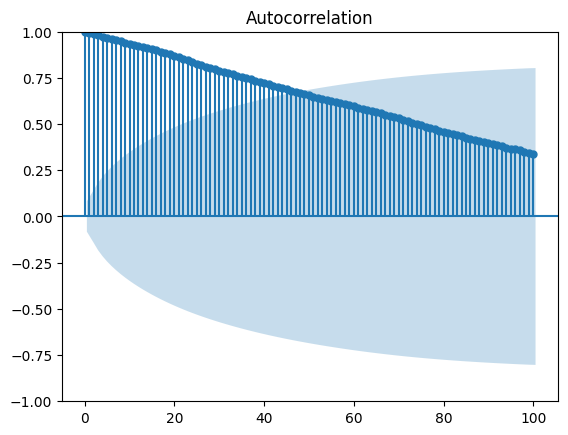

In [ ]:
# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=100)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
df['close'].isnull().any()

False

In [ ]:
X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

In [ ]:
n_steps_in = 30
n_features = X_value.shape[1]
n_steps_out = 3

In [ ]:
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 30 and len(y_value) == 3:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

In [ ]:
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index


In [ ]:
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [ ]:
df_aapl.head()

,open,high,low,close,adj close,volume,tp_0,tp_1,tp_2,tp_3,...,t2ve_503,t2ve_504,t2ve_505,t2ve_506,t2ve_507,t2ve_508,t2ve_509,t2ve_510,t2ve_511,t2ve_512
2013-12-31,79.167145,80.182854,79.142860,80.145714,74.571281,55771100.0,1.0,0.0,0.0,0.0,...,0.024533,0.045217,0.082425,-0.009038,0.024683,0.014230,-0.005057,0.036838,-0.034250,0.042868
2014-01-02,79.382858,79.575714,78.860001,79.018570,73.522530,58671200.0,31.0,0.0,0.0,0.0,...,-0.007182,0.042413,0.045770,0.003726,0.038268,0.026364,-0.009559,0.031142,-0.054542,-0.013422
2014-01-03,78.980003,79.099998,77.204285,77.282860,71.907555,98116900.0,21.0,0.0,0.0,0.0,...,0.006636,0.038112,0.044563,0.007831,0.034383,0.044858,-0.010264,0.029918,-0.045999,0.008392
2014-01-06,76.778572,78.114288,76.228569,77.704285,72.299644,103152700.0,23.0,0.0,0.0,0.0,...,-0.007880,0.037298,0.038681,0.006227,0.044810,0.036108,-0.015761,0.038726,-0.056275,0.008063
2014-01-07,77.760002,77.994286,76.845711,77.148575,71.782608,79302300.0,30.0,0.0,0.0,0.0,...,0.017537,0.035414,0.047031,0.004343,0.008410,0.024958,-0.021569,0.035876,-0.047079,0.004117


In [ ]:
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(df_aapl, X_train, n_steps_in, n_steps_out)

In [ ]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

X shape:  (534, 30, 573)
y shape:  (534, 3)
X_train shape:  (374, 30, 573)
y_train shape:  (374, 3)
y_c_train shape:  (374, 30, 1)
X_test shape:  (160, 30, 573)
y_test shape:  (160, 3)
y_c_test shape:  (160, 30, 1)
index_train shape: (376,)
index_test shape: (162,)


In [ ]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


In [ ]:
#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [ ]:
def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    return model


In [ ]:
from math import sqrt

Epoch 1/50
6/6 - 8s - loss: 1.3468 - val_loss: 2.0337 - 8s/epoch - 1s/step
Epoch 2/50
6/6 - 2s - loss: 1.6132 - val_loss: 0.0960 - 2s/epoch - 347ms/step
Epoch 3/50
6/6 - 2s - loss: 0.5362 - val_loss: 0.2746 - 2s/epoch - 355ms/step
Epoch 4/50
6/6 - 1s - loss: 0.2976 - val_loss: 0.0786 - 1s/epoch - 205ms/step
Epoch 5/50
6/6 - 1s - loss: 0.1666 - val_loss: 0.0787 - 1s/epoch - 209ms/step
Epoch 6/50
6/6 - 1s - loss: 0.2099 - val_loss: 0.1014 - 1s/epoch - 207ms/step
Epoch 7/50
6/6 - 1s - loss: 0.1985 - val_loss: 0.0655 - 1s/epoch - 210ms/step
Epoch 8/50
6/6 - 1s - loss: 0.1284 - val_loss: 0.0698 - 1s/epoch - 209ms/step
Epoch 9/50
6/6 - 1s - loss: 0.0615 - val_loss: 0.1033 - 1s/epoch - 209ms/step
Epoch 10/50
6/6 - 1s - loss: 0.0331 - val_loss: 0.1258 - 1s/epoch - 205ms/step
Epoch 11/50
6/6 - 1s - loss: 0.0235 - val_loss: 0.1392 - 1s/epoch - 223ms/step
Epoch 12/50
6/6 - 2s - loss: 0.0224 - val_loss: 0.0913 - 2s/epoch - 359ms/step
Epoch 13/50
6/6 - 2s - loss: 0.0185 - val_loss: 0.1267 - 2s/epoc

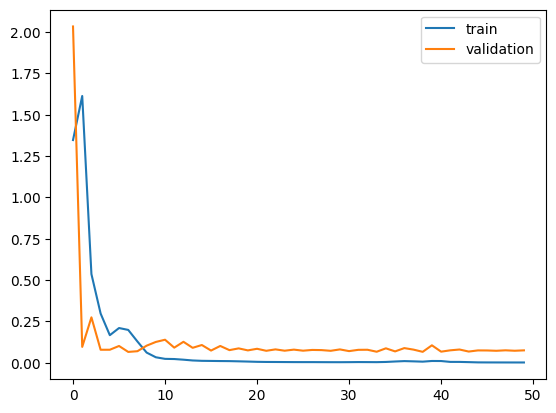

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               718848    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 735491 (2.81 MB)
Trainable params: 735491 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
0.27368994782582984


In [ ]:
model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

In [ ]:
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE

In [ ]:
# %% --------------------------------------- Plot the TEST result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE


In [ ]:
from pickle import dump, load

In [ ]:
dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

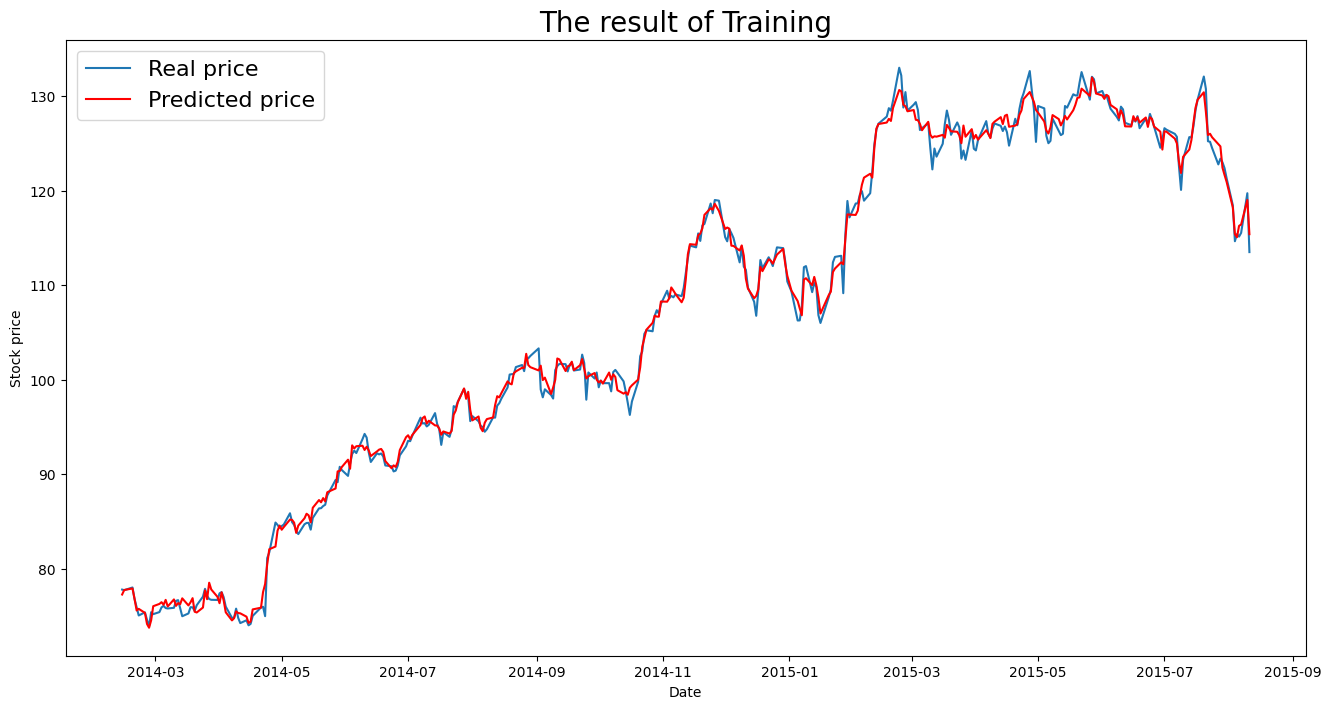

----- Train_RMSE_LSTM ----- 0.9823479152235967
            predicted_price  predicted_price  predicted_price  \
2016-03-17              NaN              NaN              NaN   
2016-03-18              NaN              NaN              NaN   
2016-03-21              NaN              NaN              NaN   
2016-03-22              NaN              NaN              NaN   
2016-03-23              NaN              NaN              NaN   
2016-03-24              NaN              NaN              NaN   
2016-03-28              NaN              NaN              NaN   
2016-03-29              NaN              NaN              NaN   
2016-03-30              NaN              NaN              NaN   
2016-03-31              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2016-03-17              NaN              NaN              NaN   
2016-03-18              NaN              NaN              NaN   
2016-03-21              NaN              N

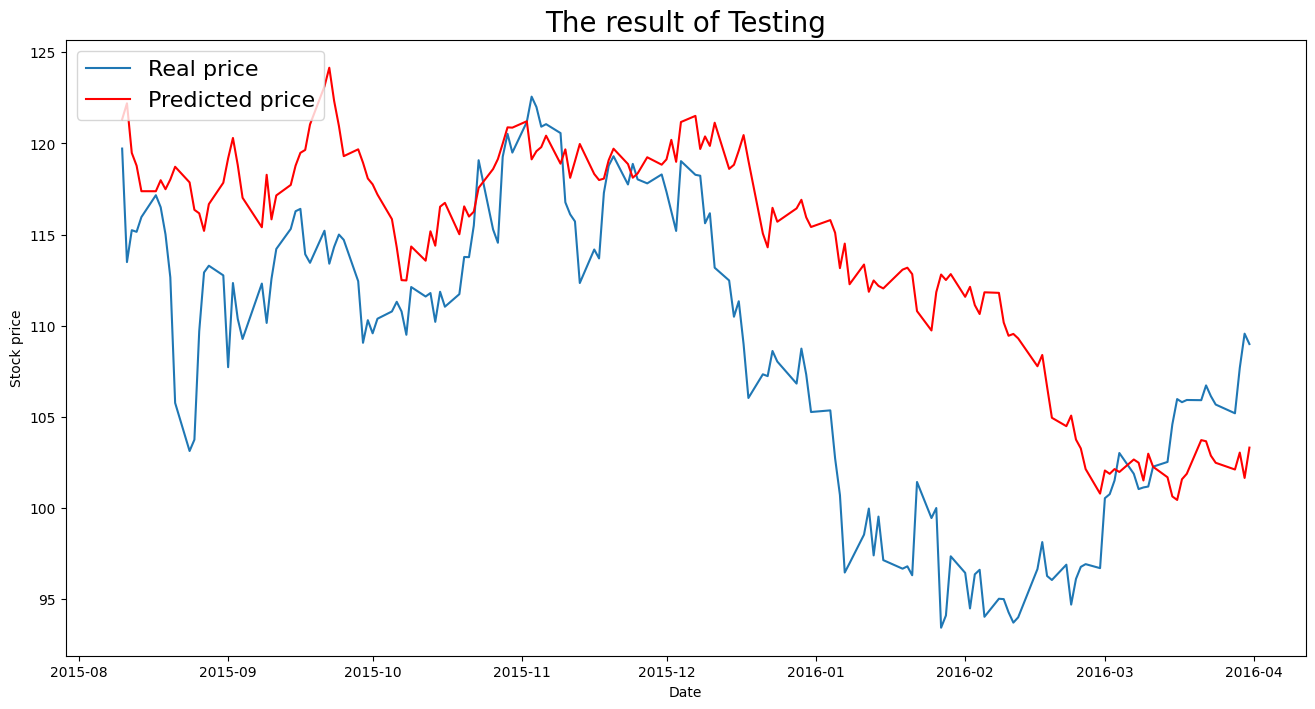

----- Test_RMSE_LSTM ----- 8.242329643302803


In [ ]:
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

Epoch 1/50
4/4 - 6s - loss: 1.7278 - val_loss: 0.1630 - 6s/epoch - 2s/step
Epoch 2/50
4/4 - 0s - loss: 0.5397 - val_loss: 0.3907 - 121ms/epoch - 30ms/step
Epoch 3/50
4/4 - 0s - loss: 0.5149 - val_loss: 0.0767 - 125ms/epoch - 31ms/step
Epoch 4/50
4/4 - 0s - loss: 0.2693 - val_loss: 0.0915 - 121ms/epoch - 30ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0952 - val_loss: 0.0661 - 120ms/epoch - 30ms/step
Epoch 6/50
4/4 - 0s - loss: 0.1114 - val_loss: 0.1247 - 137ms/epoch - 34ms/step
Epoch 7/50
4/4 - 0s - loss: 0.1125 - val_loss: 0.0396 - 126ms/epoch - 32ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0676 - val_loss: 0.0486 - 126ms/epoch - 31ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0501 - val_loss: 0.0412 - 126ms/epoch - 31ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0266 - val_loss: 0.0583 - 126ms/epoch - 32ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0279 - val_loss: 0.0283 - 123ms/epoch - 31ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0263 - val_loss: 0.0251 - 120ms/epoch - 30ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0180 - val_

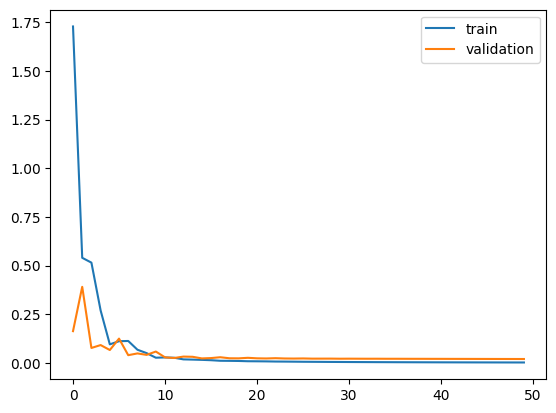

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 128)            269952    
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 309313 (1.18 MB)
Trainable params: 309313 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.14118866952567807


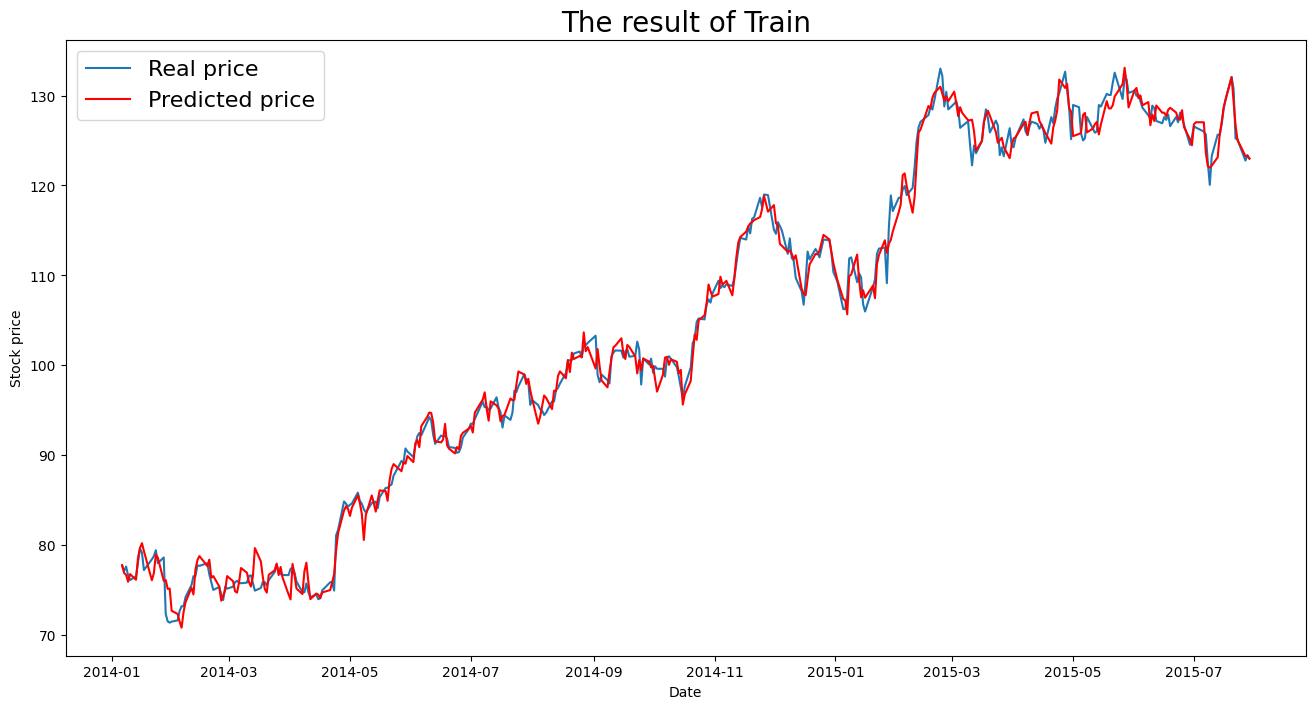

----- Train_RMSE_LSTM ----- 1.394251519590255
            predicted_price  predicted_price  predicted_price  \
2016-03-17              NaN              NaN              NaN   
2016-03-18              NaN              NaN              NaN   
2016-03-21              NaN              NaN              NaN   
2016-03-22              NaN              NaN              NaN   
2016-03-23              NaN              NaN              NaN   
2016-03-24              NaN              NaN              NaN   
2016-03-28              NaN              NaN              NaN   
2016-03-29              NaN              NaN              NaN   
2016-03-30              NaN              NaN              NaN   
2016-03-31              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2016-03-17              NaN              NaN              NaN   
2016-03-18              NaN              NaN              NaN   
2016-03-21              NaN              Na

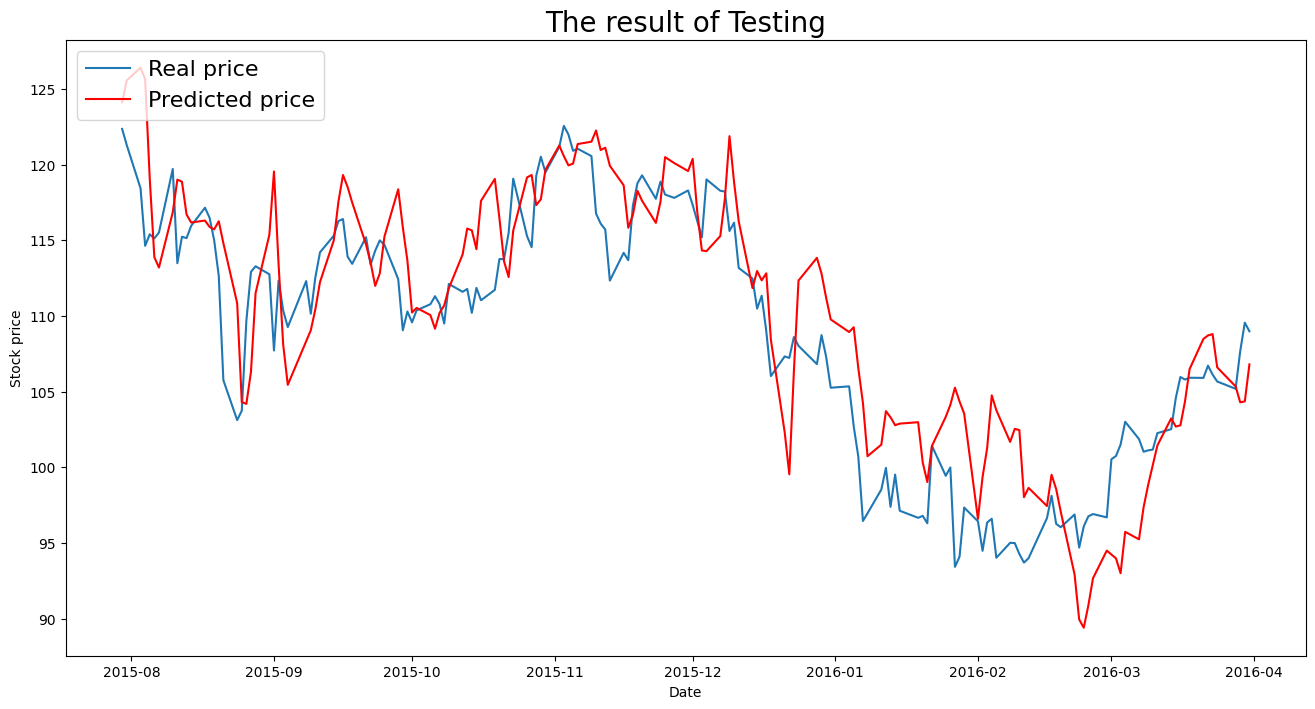

----- Test_RMSE_LSTM ----- 4.348812516636909


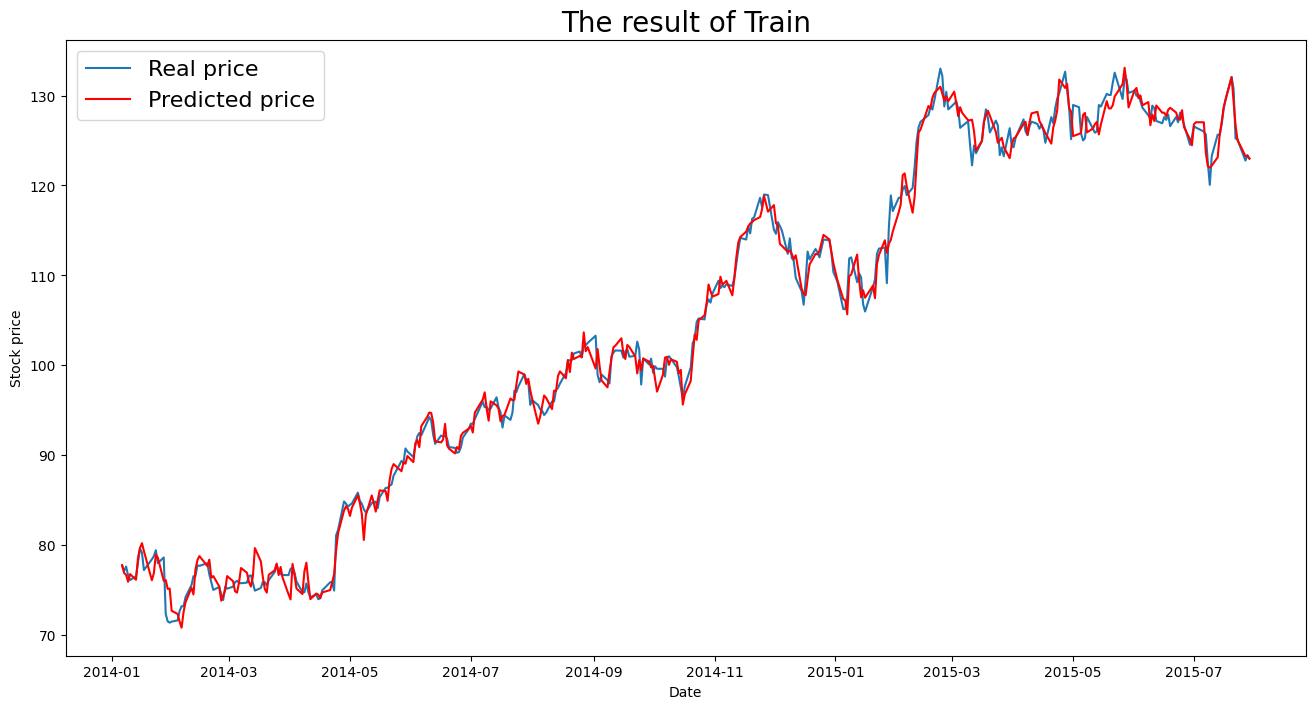

----- Train_RMSE_LSTM ----- 1.394251519590255
            predicted_price  predicted_price  predicted_price  \
2016-03-17              NaN              NaN              NaN   
2016-03-18              NaN              NaN              NaN   
2016-03-21              NaN              NaN              NaN   
2016-03-22              NaN              NaN              NaN   
2016-03-23              NaN              NaN              NaN   
2016-03-24              NaN              NaN              NaN   
2016-03-28              NaN              NaN              NaN   
2016-03-29              NaN              NaN              NaN   
2016-03-30              NaN              NaN              NaN   
2016-03-31              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2016-03-17              NaN              NaN              NaN   
2016-03-18              NaN              NaN              NaN   
2016-03-21              NaN              Na

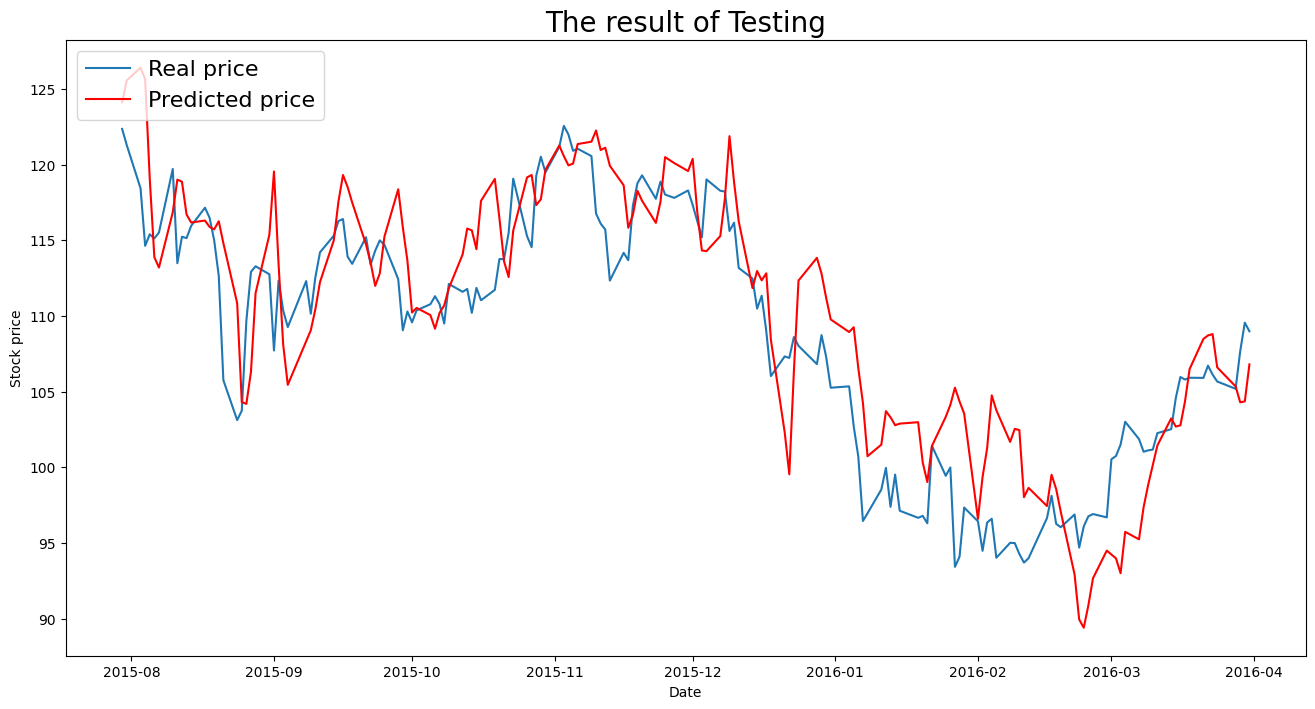

----- Test_RMSE_LSTM ----- 4.348812516636909


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

# Parameters
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]


def basic_GRU(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=128, return_sequences = True, input_shape=(input_dim, feature_size)))  # 256, return_sequences = True
    # model.add(GRU(units=256, recurrent_dropout = 0.2)) #, return_sequences = True
    model.add(GRU(units=64, input_shape=(input_dim, feature_size)))
    #model.add(Dense(128))
    model.add(Dense(32))
    # model.add(Dense(32))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr=LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model


model = basic_GRU(input_dim, output_dim, feature_size)
print(model.summary())
model.save('GRU_30to3.h5')

yhat = model.predict(X_test, verbose=0)
# print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)


# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):
    train_yhat = model.predict(X_train, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Train", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE


# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE


train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)


'''def plot_last3_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test[-1].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]), verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test[-32:])
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    #print("----- test dataset rescaled predicted price -----", rescaled_predicted_y)
    #print("----- test dataset SHAPE rescaled predicted price -----", rescaled_predicted_y.shape)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        test_predict_index = test_predict_index[-34:]
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    ## Predicted price
    predict_result = pd.DataFrame()
    y_predict = pd.DataFrame(rescaled_predicted_y[0], columns=["predicted_price"], index=test_predict_index[-3:])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.ylim(0, 100)
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of the last set of testdata", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real[-3:]))
    #print('-- test dataset RMSE -- ', RMSE)

    return RMSE'''


train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             10304     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 220)               28160     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 220)               0         
                                                                 
 dense_14 (Dense)            (None, 220)              

<ipython-input-45-0e51a32b35ca>:134: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(generator, 'gen_model_3_1_%d.h5' % epoch)


epoch 15 d_loss 1.3738663 g_loss 0.7115497


epoch 30 d_loss 1.333436 g_loss 0.7485928


epoch 45 d_loss 1.3641007 g_loss 0.68978316


epoch 60 d_loss 1.4103515 g_loss 0.6128842


epoch 75 d_loss 1.4036131 g_loss 0.627131


epoch 90 d_loss 1.3953967 g_loss 0.72225124


epoch 105 d_loss 1.4069034 g_loss 0.64923644


epoch 120 d_loss 1.409545 g_loss 0.71142656


epoch 135 d_loss 1.3902408 g_loss 0.68660516


epoch 150 d_loss 1.3890725 g_loss 0.6970163


epoch 165 d_loss 1.3897681 g_loss 0.6893509


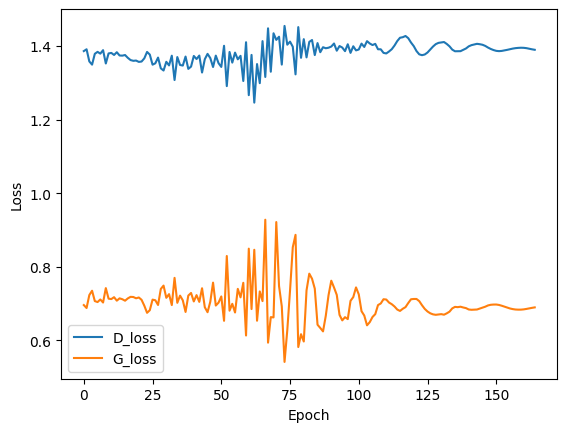

----- predicted price ----- [[-8.45170975e-01]
 [-8.25126886e-01]
 [-8.70101273e-01]
 [-8.44426632e-01]
 [-8.48343372e-01]
 [-8.86488557e-01]
 [-8.90585423e-01]
 [-8.44991446e-01]
 [-8.16374183e-01]
 [-7.75754750e-01]
 [-8.06913972e-01]
 [-7.99416780e-01]
 [-7.89804935e-01]
 [-7.81604528e-01]
 [-7.95623958e-01]
 [-7.76331961e-01]
 [-8.59103680e-01]
 [-9.53838587e-01]
 [-1.05977380e+00]
 [-1.06239438e+00]
 [-1.06109321e+00]
 [-1.06751812e+00]
 [-1.03517365e+00]
 [-1.04425275e+00]
 [-9.94841933e-01]
 [-9.64754939e-01]
 [-9.15866137e-01]
 [-9.05794263e-01]
 [-8.61282468e-01]
 [-8.54801178e-01]
 [-8.50844562e-01]
 [-8.50171328e-01]
 [-8.91927004e-01]
 [-9.19787169e-01]
 [-9.59615231e-01]
 [-9.52059686e-01]
 [-9.57359314e-01]
 [-9.41205502e-01]
 [-9.33807969e-01]
 [-9.39092159e-01]
 [-9.36760187e-01]
 [-9.27950919e-01]
 [-8.87063026e-01]
 [-8.98040056e-01]
 [-9.05527353e-01]
 [-9.25460815e-01]
 [-8.78720045e-01]
 [-8.88301730e-01]
 [-9.15555656e-01]
 [-9.08701897e-01]
 [-9.16772366e-01]
 [-

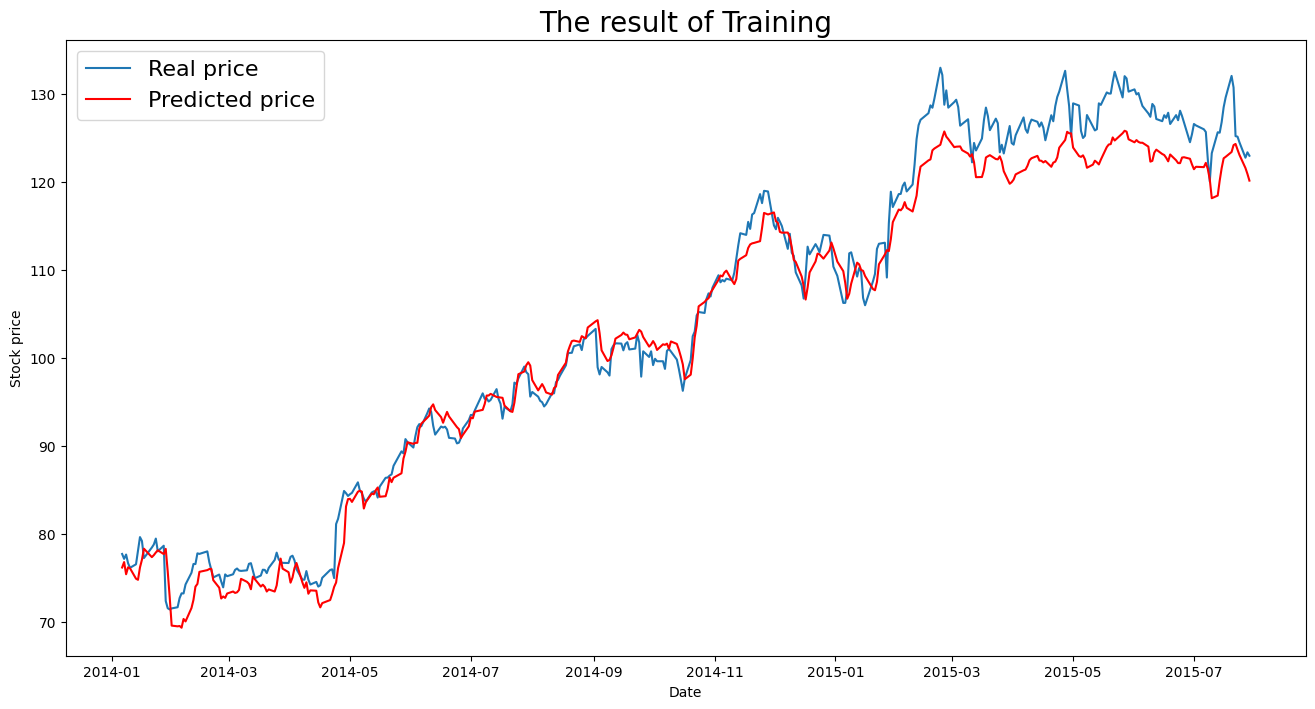

-- Train RMSE --  3.151835379371454


In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


def make_generator_model(input_dim, output_dim, feature_size) -> tf.keras.models.Model:

    model = Sequential()
    model.add(GRU(units=1024, return_sequences = True, input_shape=(input_dim, feature_size),
                  recurrent_dropout=0.2))
    model.add(GRU(units=512, return_sequences = True, recurrent_dropout=0.2)) # 256, return_sequences = True
    model.add(GRU(units=256, recurrent_dropout=0.2)) #, recurrent_dropout=0.1
    # , recurrent_dropout = 0.2
    model.add(Dense(128))
    # model.add(Dense(128))
    model.add(Dense(64))
    #model.add(Dense(16))
    model.add(Dense(units=output_dim))
    return model

def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())


class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            # Reshape for MLP
            # d_fake_input = tf.reshape(d_fake_input, [d_fake_input.shape[0], d_fake_input.shape[1]])
            # d_real_input = tf.reshape(d_real_input, [d_real_input.shape[0], d_real_input.shape[1]])

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(generator, 'gen_model_3_1_%d.h5' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print('epoch', epoch + 1, 'd_loss', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())
            # print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
            # For printing loss
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)


if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    ## For Bayesian
    opt = {"lr": 0.00016, "epoch": 165, 'bs': 128}

    generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
<ipython-input-45-0e51a32b35ca>:134: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(generator, 'gen_model_3_1_%d.h5' % epoch)


epoch 15 d_loss 1.3864295 g_loss 0.6989753


epoch 30 d_loss 1.380971 g_loss 0.6769718


epoch 45 d_loss 1.3837786 g_loss 0.7014419


epoch 60 d_loss 1.3926411 g_loss 0.69811714


epoch 75 d_loss 1.3886745 g_loss 0.695032


epoch 90 d_loss 1.3859463 g_loss 0.6866107


epoch 105 d_loss 1.3871443 g_loss 0.6951817


epoch 120 d_loss 1.3866122 g_loss 0.6954551


epoch 135 d_loss 1.3863825 g_loss 0.6913967


epoch 150 d_loss 1.3869362 g_loss 0.69441426


epoch 165 d_loss 1.3867189 g_loss 0.6971975


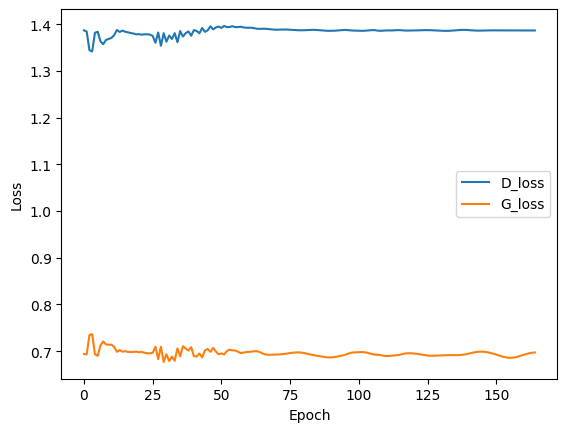

----- predicted price ----- [[ 0.67662114]
 [ 0.65378726]
 [ 0.66431016]
 [ 0.5854413 ]
 [ 0.46293062]
 [ 0.3623712 ]
 [ 0.41014025]
 [ 0.43929833]
 [ 0.5180289 ]
 [ 0.5127116 ]
 [ 0.41790688]
 [ 0.39832953]
 [ 0.43274552]
 [ 0.49240047]
 [ 0.4818397 ]
 [ 0.45635587]
 [ 0.40174657]
 [ 0.2888032 ]
 [ 0.08115027]
 [ 0.03741085]
 [ 0.20543821]
 [ 0.36262894]
 [ 0.42273453]
 [ 0.3454222 ]
 [ 0.28798422]
 [ 0.2679939 ]
 [ 0.32305792]
 [ 0.27884516]
 [ 0.29423186]
 [ 0.32256892]
 [ 0.3667223 ]
 [ 0.37881377]
 [ 0.4272251 ]
 [ 0.45626244]
 [ 0.41360164]
 [ 0.4173195 ]
 [ 0.4184733 ]
 [ 0.4057805 ]
 [ 0.3828866 ]
 [ 0.36724073]
 [ 0.3807919 ]
 [ 0.41049445]
 [ 0.34677756]
 [ 0.33203122]
 [ 0.25865358]
 [ 0.2892205 ]
 [ 0.23830101]
 [ 0.32420343]
 [ 0.32079142]
 [ 0.3151645 ]
 [ 0.29095685]
 [ 0.3114698 ]
 [ 0.3226692 ]
 [ 0.34158918]
 [ 0.2996995 ]
 [ 0.34452572]
 [ 0.32271433]
 [ 0.33738783]
 [ 0.34109402]
 [ 0.40618896]
 [ 0.3885058 ]
 [ 0.4672457 ]
 [ 0.47777855]
 [ 0.4960769 ]
 [ 0.4684271

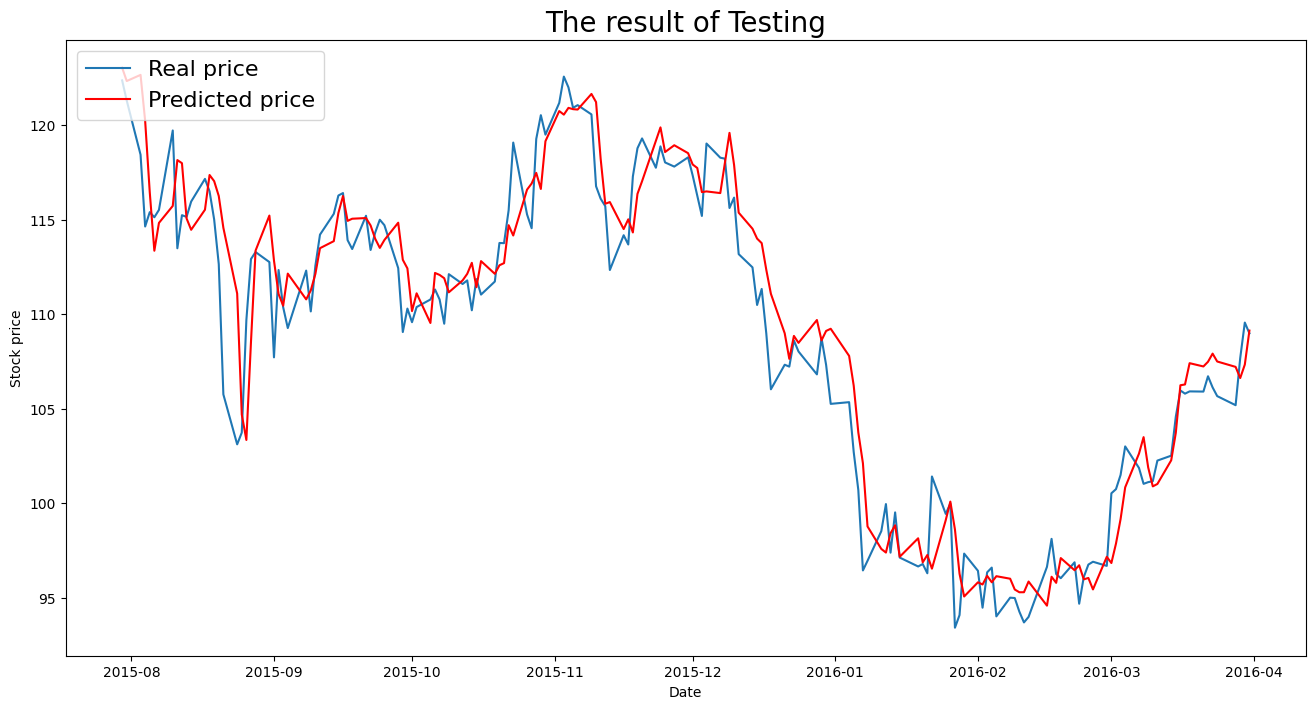

-- Test RMSE --  2.321823247622217


In [ ]:
if __name__ == '__main__':
    input_dim = X_test.shape[1]
    feature_size = X_test.shape[2]
    output_dim = y_test.shape[1]

    ## For Bayesian
    opt = {"lr": 0.00016, "epoch": 165, 'bs': 128}

    generator = make_generator_model(X_test.shape[1], output_dim, X_test.shape[2])
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_test, y_test, yc_test, opt)

# %% --------------------------------------- Plot the result  -----------------------------------------------------------------

# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_test = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_test], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Testing", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Test RMSE -- ', RMSE)